In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(2160, 3840, 3)

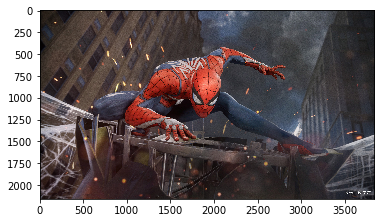

In [11]:
full = cv2.imread("spy.jpg")
full =cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)
full.shape

(573, 363, 3)

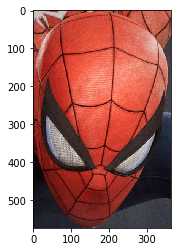

In [14]:
face = cv2.imread("spy_face.jpg")
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)
face.shape

In [15]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

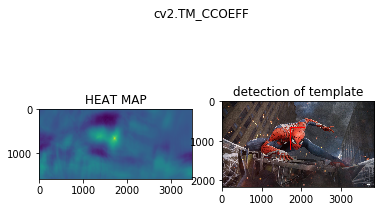

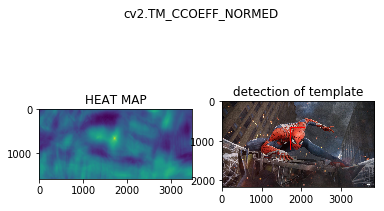

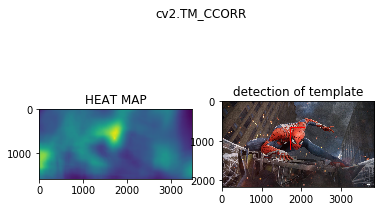

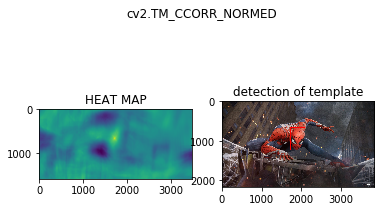

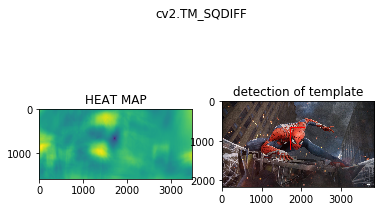

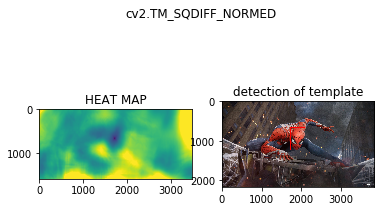

In [17]:
for m in methods:
    full_copy = full.copy()
    method = eval(m)
    
    result = cv2.matchTemplate(full_copy,face,method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(result)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    height,width,channel = face.shape
    bottom_right =(top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),12)
    
    plt.subplot(121)
    plt.imshow(result)
    plt.title("HEAT MAP")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("detection of template")
    
    plt.suptitle(m)
    plt.show()
    print("\n")
    